# High-frequency Radar observations of surface currents

HF radar is amazing! With the right configuration of radars you can get ocean surface velocity over a broad area, at high spatial and temporal resolution. There is an extensive (and growing) network of these radar around the world. 

In the US the data is aggregated and dististributed by the National HFRADAR Network: http://cordc.ucsd.edu/projects/mapping/ and hosted at the Coastal Observing Research and Development Center Scripps Institution of Oceanography (https://cordc.ucsd.edu/).

Data are available via THREDDS for 5 regions at https://hfrnet-tds.ucsd.edu/thredds/catalog.html:
* US West Coast : 
* US East and Gulf Coast
* US Hawai'i State
* Alaska, North Slope
* Puerto Rico and the US Virgin Islands

Data is available for each region at different spatial and temporal resolutions (resulting from different radar frequencies and data processing steps).

Lots of detailed information is available from the github page for the Radiowave Operators Working Group: https://github.com/rowg, and from IOOS: https://ioos.noaa.gov/project/hf-radar/





In [1]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt


%matplotlib inline

/Users/beaird/anaconda3/lib/python3.7/site-packages/xarray/core/merge.py:17: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


# links for the 6km hourly data for the 5 regions are below:

In [2]:
url_USwest_6km = 'http://hfrnet-tds.ucsd.edu/thredds/dodsC/HFR/USWC/6km/hourly/RTV/HFRADAR_US_West_Coast_6km_Resolution_Hourly_RTV_best.ncd'
url_USeast_6km = 'http://hfrnet-tds.ucsd.edu/thredds/dodsC/HFR/USEGC/6km/hourly/RTV/HFRADAR_US_East_and_Gulf_Coast_6km_Resolution_Hourly_RTV_best.ncd'
url_alaska_6km = 'http://hfrnet-tds.ucsd.edu/thredds/dodsC/HFR/AKNS/6km/hourly/RTV/HFRADAR_Alaska_-_North_Slope_6km_Resolution_Hourly_RTV_best.ncd'
url_hawaii_6km = 'http://hfrnet-tds.ucsd.edu/thredds/dodsC/HFR/USHI/6km/hourly/RTV/HFRADAR_US_Hawaii_6km_Resolution_Hourly_RTV_best.ncd'
url_puerto_rico_6km = 'http://hfrnet-tds.ucsd.edu/thredds/dodsC/HFR/PRVI/6km/hourly/RTV/HFRADAR_Puerto_Rico_and_the_US_Virgin_Islands_6km_Resolution_Hourly_RTV_best.ncd'



# Load data from a region

xarray uses lazy-loading, so this will just load the metadata. We will want to select a smaller time or space region so that the files aren't so huge. 

In [3]:
ds = xr.open_dataset(url_USeast_6km)

ds

<xarray.Dataset>
Dimensions:       (lat: 460, lon: 701, nProcParam: 7, nSites: 42, time: 69132)
Coordinates:
  * lat           (lat) float32 21.73596 21.7899 21.84384 ... 46.44048 46.49442
  * lon           (lon) float32 -97.88385 -97.825775 ... -57.289284 -57.23121
  * time          (time) datetime64[ns] 2012-01-01 ... 2019-11-22T20:00:00
    time_run      (time) datetime64[ns] ...
Dimensions without coordinates: nProcParam, nSites
Data variables:
    site_lat      (nSites) float32 ...
    site_lon      (nSites) float32 ...
    site_code     (nSites) |S64 ...
    site_netCode  (nSites) |S64 ...
    procParams    (nProcParam) float32 ...
    time_offset   (time) datetime64[ns] ...
    u             (time, lat, lon) float32 ...
    v             (time, lat, lon) float32 ...
    DOPx          (time, lat, lon) float32 ...
    DOPy          (time, lat, lon) float32 ...
Attributes:
    netcdf_library_version:  4.1.3
    format_version:          HFRNet_1.0.0
    product_version:         HFRN

# select a subset of the data:
# Mid-Atlantic Bight

Here I will grab the midatlantic region
```python
MAB = ds.___(lat = slice() , lon = ___(__,__))

```

then grab a particular time below


In [5]:

MAB = ds.sel(lat = slice(36.6, 41.5) , lon = slice(-76.6,  -66.1))
MAB = MAB.sel( time = '2019-07-21 12:00', method='nearest')
MAB

<xarray.Dataset>
Dimensions:       (lat: 91, lon: 181, nProcParam: 7, nSites: 42)
Coordinates:
  * lat           (lat) float32 36.6234 36.67734 36.73128 ... 41.42406 41.478
  * lon           (lon) float32 -76.57025 -76.51218 ... -66.17479 -66.116714
    time          datetime64[ns] 2019-07-21T12:00:00
    time_run      datetime64[ns] ...
Dimensions without coordinates: nProcParam, nSites
Data variables:
    site_lat      (nSites) float32 ...
    site_lon      (nSites) float32 ...
    site_code     (nSites) |S64 ...
    site_netCode  (nSites) |S64 ...
    procParams    (nProcParam) float32 ...
    time_offset   datetime64[ns] ...
    u             (lat, lon) float32 ...
    v             (lat, lon) float32 ...
    DOPx          (lat, lon) float32 ...
    DOPy          (lat, lon) float32 ...
Attributes:
    netcdf_library_version:  4.1.3
    format_version:          HFRNet_1.0.0
    product_version:         HFRNet_1.1.05
    Conventions:             CF-1.4
    title:                   Ne

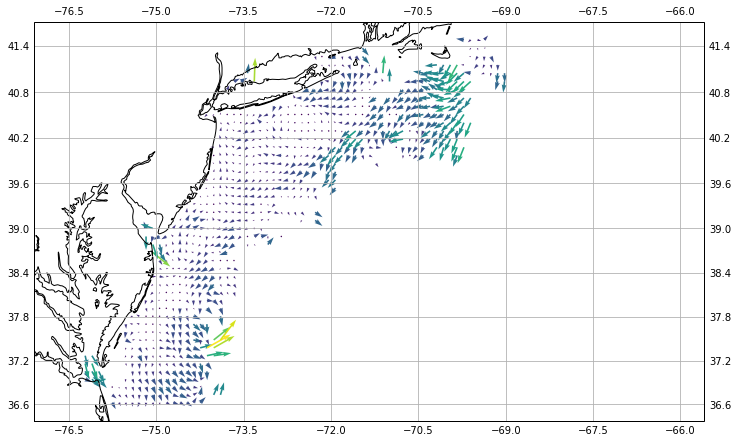

In [25]:
data_crs = ccrs.PlateCarree()
projection = ccrs.Mercator()

fig, ax = plt.subplots(1, 1,
    figsize=(12, 12),
    subplot_kw=dict(projection=projection)
)

# might want to subset the data
data_step = 2

lat = MAB.lat[::data_step].values
lon = MAB.lon[::data_step].values
u = MAB.u[::data_step, ::data_step].values
v = MAB.v[::data_step, ::data_step].values
spd = (u**2 + v**2)**0.5

Q = ax.quiver(lon, lat, u, v,  spd, transform=data_crs)
# ax.quiverkey(Q, -72.0, 37.8, 0.5, '0.5 m/s', color='k', transform=data_crs)

ax.coastlines(resolution='10m')
ax.gridlines(draw_labels=True)
# ax.grid()
# ax[0].set_extent([-159, -154, 70.8, 72.0])